<a href="https://colab.research.google.com/github/AinaHerrera/ejerciciosIA/blob/main/Checkpoint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SenseAI x Student Stress Monitoring: An√°lisis exploratorio y variables clave**
[Kaggle dataset](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets)

En este cuaderno, el prop√≥sito es producir hallazgos visuales y accionables que conecten directamente con el proyecto SenseAI, priorizando decisiones de producto como ajuste de carga de estudio, pausas inteligentes y tutor√≠a adaptativa.

Contexto del problema y preguntas gu√≠a

Como parte del desarrollo de SenseAI, necesito comprender qu√© factores est√°n m√°s asociados con el estr√©s estudiantil para anticipar sobrecarga y ajustar la experiencia de aprendizaje. Mis preguntas gu√≠a son:

¬øQu√© variable representar√© como nivel de estr√©s (target) y por qu√©?

¬øQu√© 2‚Äì5 se√±ales (features) explican diferencias en ese target?

¬øQu√© patrones visuales sostienen decisiones concretas del producto (umbrales, recomendaciones, nudges)?

Descripci√≥n del dataset y alcance

Utilizo un dataset p√∫blico de estr√©s en estudiantes que re√∫ne variables psicosociales, acad√©micas y som√°ticas (ej., calidad de sue√±o, presi√≥n acad√©mica, estr√©s financiero, apoyo social, cefalea). El alcance de este cuaderno es exploratorio: inspecciono estructura, defino target y features, genero al menos tres visualizaciones interpretadas y dejo listos los insumos para modelado ligero en una fase posterior.

In [2]:
# Sistema / utilidades
import os, re, sys, warnings
from pathlib import Path

# Ciencia de datos
import numpy as np
import pandas as pd

# Visualizaci√≥n (solo matplotlib)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Config general
warnings.filterwarnings("ignore")

# Opciones de pandas
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

# Estilo de gr√°ficos
mpl.rcParams["figure.figsize"] = (8, 5)
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["axes.grid"] = True

# Carpetas de salida
FIG_DIR = Path("figures"); FIG_DIR.mkdir(exist_ok=True)
OUT_DIR = Path("outputs"); OUT_DIR.mkdir(exist_ok=True)

# Utilidades ligeras
def snake(s: str) -> str:
    return re.sub(r"[^a-z0-9]+", "_", s.strip().lower()).strip("_")

def savefig(fname: str):
    p = FIG_DIR / fname
    plt.savefig(p, dpi=200, bbox_inches="tight")
    print(f"[Figura guardada] {p.resolve()}")

def mem_usage_mb(df: pd.DataFrame) -> float:
    return df.memory_usage(deep=True).sum() / (1024**2)

# Log de entorno
print("== ENTORNO LISTO ==")
print(f"Python: {sys.version.split()[0]}")
print(f"NumPy:  {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {mpl.__version__}")
print(f"Figuras: {FIG_DIR.resolve()}")
print(f"Salidas: {OUT_DIR.resolve()}")



== ENTORNO LISTO ==
Python: 3.12.12
NumPy:  2.0.2
Pandas: 2.2.2
Matplotlib: 3.10.0
Figuras: /content/figures
Salidas: /content/outputs


Supuestos y criterios de inclusi√≥n de variables

Trabajo con las columnas disponibles en el CSV descargado; si hay nombres alternos o escalas distintas, estandarizo. Evito fuga de etiqueta (no uso como feature una variable que sea el mismo constructo que el target con otro nombre) y priorizo se√±ales que SenseAI pueda intervenir (sue√±o, presi√≥n acad√©mica, h√°bitos de estudio, apoyo social).

In [3]:
CSV_PATH = "/content/StressLevelDataset.csv"
def snake(s):
    return re.sub(r'[^a-z0-9]+','_', s.strip().lower()).strip('_')

df = pd.read_csv(CSV_PATH)
df.columns = [snake(c) for c in df.columns]

print("== CARGA EXITOSA ==")
print(f"Archivo: {CSV_PATH} | Shape: {df.shape}")
print("Primeras columnas:", list(df.columns)[:12])
display(df.head())
print("\nTipos (conteo):")
print(df.dtypes.value_counts())
print("\nNulos TOP 10:")
print(df.isna().sum().sort_values(ascending=False).head(10))


== CARGA EXITOSA ==
Archivo: /content/StressLevelDataset.csv | Shape: (1100, 21)
Primeras columnas: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs']


anxiety_level  self_esteem  mental_health_history  depression  headache  blood_pressure  sleep_quality  \
0             14           20                      0          11         2               1              2   
1             15            8                      1          15         5               3              1   
2             12           18                      1          14         2               1              2   
3             16           12                      1          15         4               3              1   
4             16           28                      0           7         2               3              5   

   breathing_problem  noise_level  living_conditions  safety  basic_needs  academic_performance  study_load  \
0                  4            2                  3       3            2                     3           2   
1                  4            3                  1       2            2                     1           4   
2                  2            2                  2       3            2                     2           3   
3                  3            4                  2       2            2                     2           4   
4                  1            3                  2       4            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  peer_pressure  extracurricular_activities  \
0                             3                       3               2              3                           3   
1                             1                       5               1              4                           5   
2                             3                       2               2              3                           2   
3                             1                       4               1              4                           4   
4                             1                       2               1              5                           0   

   bullying  stress_level  
0         2             1  
1         5             2  
2         2             1  
3         5             2  
4         5             1


Tipos (conteo):
int64    21
Name: count, dtype: int64

Nulos TOP 10:
anxiety_level            0
self_esteem              0
mental_health_history    0
depression               0
headache                 0
blood_pressure           0
sleep_quality            0
breathing_problem        0
noise_level              0
living_conditions        0
dtype: int64


Definici√≥n del target (etiqueta) y justificaci√≥n

Mi objetivo principal es representar el nivel de estr√©s del estudiante. Si existe una columna expl√≠cita (p. ej., stress_level, stress, anxiety_level o depression), la usar√© como target y justificar√© su elecci√≥n por relevancia directa con el bienestar acad√©mico que SenseAI monitorea.
Si el dataset no incluye una etiqueta de estr√©s clara, construir√© un √≠ndice continuo overall_stress_idx promediando (estandarizados) indicadores conceptualmente relacionados (p. ej., ansiedad, presi√≥n acad√©mica, estr√©s financiero) e invirtiendo la calidad de sue√±o si mayor=mejor. Este √≠ndice me permitir√° definir umbrales pr√°cticos para decisiones del producto.

In [4]:
import re

# (si ejecutaste C1, df ya existe)
assert "df" in globals(), "Primero ejecuta la C1 para cargar el DataFrame 'df'."

def available(cols):
    return [c for c in cols if c in df.columns]

# 1) Elegir TARGET
# Prioridad: stress_level -> stress -> anxiety_level -> depression -> derivado
candidates = ["stress_level", "stress", "anxiety_level", "depression"]
target_col = next((c for c in candidates if c in df.columns), None)

if target_col is None:
    # Derivamos un √≠ndice simple de estr√©s si no hay etiqueta clara
    proxies = available([
        "anxiety_level", "depression",
        "peer_pressure", "study_load",
        "sleep_quality",  # se invertir√° (mayor=mejor) si procede m√°s adelante
        "future_career_concerns", "noise_level", "basic_needs"
    ])
    if len(proxies) < 2:
        raise ValueError("No hay target expl√≠cito ni suficientes proxies para derivarlo.")
    z = df[proxies].apply(pd.to_numeric, errors="coerce")
    # invertir sleep_quality si existe (suponiendo escala mayor=mejor)
    if "sleep_quality" in z.columns:
        z["sleep_quality"] = -1 * (z["sleep_quality"] - z["sleep_quality"].mean())/z["sleep_quality"].std(ddof=0)
    z = (z - z.mean())/z.std(ddof=0)
    df["overall_stress_idx"] = z.mean(axis=1)
    target_col = "overall_stress_idx"
    target_mode = "derivado"
else:
    target_mode = "expl√≠cito"

print("== TARGET SELECCIONADO ==")
print(f"Columna: {target_col} | Modo: {target_mode}")
print("Tipo:", df[target_col].dtype)
print("Valores √∫nicos (hasta 15):", sorted(df[target_col].unique())[:15])
print("Rango:", (np.nanmin(df[target_col]), np.nanmax(df[target_col])))

# 2) Preselecci√≥n de FEATURES (m√°x. 5)
ranked = [
    "sleep_quality", "study_load", "social_support", "peer_pressure",
    "academic_performance", "basic_needs", "noise_level",
    "teacher_student_relationship", "future_career_concerns",
    "living_conditions", "headache", "blood_pressure", "breathing_problem"
]
features = [c for c in ranked if c in df.columns and c != target_col][:5]

# Evitar columnas √≠ndice/administrativas
features = [c for c in features if not re.fullmatch(r"(index|id)", c)]

print("\n== FEATURES PRE-SELECCIONADAS (m√°x 5) ==")
print(features)

# 3) Mini-resumen para el informe (SenseAI)
print("\n== BORRADOR DE JUSTIFICACI√ìN ==")
if target_col in ["anxiety_level", "stress_level", "stress"]:
    print(f"- Target '{target_col}': proxy directo del nivel de estr√©s/ansiedad que SenseAI debe monitorear.")
elif target_col == "depression":
    print("- Target 'depression': estado afectivo relacionado con estr√©s acad√©mico; √∫til para alertas tempranas.")
else:
    print("- Target 'overall_stress_idx': √≠ndice continuo derivado que integra se√±ales psicosociales y acad√©micas.")

for f in features:
    msg = {
        "sleep_quality": "higiene del sue√±o -> ajustes de carga y pausas",
        "study_load": "dosis de estudio -> bloques m√°s cortos o re-escalado",
        "social_support": "factor protector -> refuerzos/ritmo",
        "peer_pressure": "estresor social -> microtutor√≠a",
        "academic_performance": "exigencia/resultados -> apoyo puntual",
        "basic_needs": "necesidades b√°sicas -> tareas breves, objetivos alcanzables",
        "noise_level": "ambiente -> recomendaciones de enfoque",
        "teacher_student_relationship": "v√≠nculo docente -> soporte contextual",
        "future_career_concerns": "incertidumbre -> reducci√≥n de carga",
        "living_conditions": "contexto -> flexibilidad",
        "headache": "som√°tico -> pausas y respiraci√≥n",
        "blood_pressure": "som√°tico -> pausas y respiraci√≥n",
        "breathing_problem": "som√°tico -> pausas y respiraci√≥n",
    }.get(f, "se√±al relevante para ajustes en SenseAI")
    print(f"- {f}: {msg}")


== TARGET SELECCIONADO ==
Columna: stress_level | Modo: expl√≠cito
Tipo: int64
Valores √∫nicos (hasta 15): [np.int64(0), np.int64(1), np.int64(2)]
Rango: (np.int64(0), np.int64(2))

== FEATURES PRE-SELECCIONADAS (m√°x 5) ==
['sleep_quality', 'study_load', 'social_support', 'peer_pressure', 'academic_performance']

== BORRADOR DE JUSTIFICACI√ìN ==
- Target 'stress_level': proxy directo del nivel de estr√©s/ansiedad que SenseAI debe monitorear.
- sleep_quality: higiene del sue√±o -> ajustes de carga y pausas
- study_load: dosis de estudio -> bloques m√°s cortos o re-escalado
- social_support: factor protector -> refuerzos/ritmo
- peer_pressure: estresor social -> microtutor√≠a
- academic_performance: exigencia/resultados -> apoyo puntual


Selecci√≥n preliminar de features (2‚Äì5) y conexi√≥n con SenseAI

Para explicar variaciones del target, parto de una lista corta dependiente de la disponibilidad real del CSV:

sleep_quality: higiene del sue√±o; informa reducci√≥n de carga y pausas guiadas.

academic_pressure o study_hours: dosis de estudio; orienta bloques m√°s cortos y tutor√≠a puntual.

financial_stress: estresor externo; favorece microactividades y objetivos alcanzables.

social_support o self_esteem: factor protector; ajusta progresi√≥n y refuerzos positivos.

Se√±ales som√°ticas (headache, blood_pressure): disparan nudges de respiraci√≥n/descanso.
Mantendr√© solo 2‚Äì5 features que aporten informaci√≥n no redundante y con variabilidad suficiente.

In [9]:
assert "df" in globals(), "Primero ejecuta C1 y C2."

target_col = "stress_level"
features = ['sleep_quality','study_load','social_support','peer_pressure','academic_performance']
features = [c for c in features if c in df.columns and c != target_col]

# Coerci√≥n ligera a num√©rico
dplot = df[[target_col] + features].apply(pd.to_numeric, errors="coerce")
print("Target:", target_col)
print("Features:", features)
print("Shape EDA:", dplot.shape)




Target: stress_level
Features: ['sleep_quality', 'study_load', 'social_support', 'peer_pressure', 'academic_performance']
Shape EDA: (1100, 6)


Plan de EDA y visualizaciones de variables con respecto al target

Mi an√°lisis exploratorio incluir√°, como m√≠nimo:

Distribuci√≥n del target (histograma o barras) para entender su forma y posibles desbalances.

Relaci√≥n target‚Äìfeature (box/violin o barras) para observar diferencias entre grupos o rangos.

Relaci√≥n entre dos features con color por target para detectar interacciones √∫tiles.

Matriz de correlaci√≥n (opcional) para evaluar redundancia entre se√±ales num√©ricas.
De cada gr√°fico dejar√© una interpretaci√≥n breve (2‚Äì3 l√≠neas) conectada a decisiones de SenseAI.

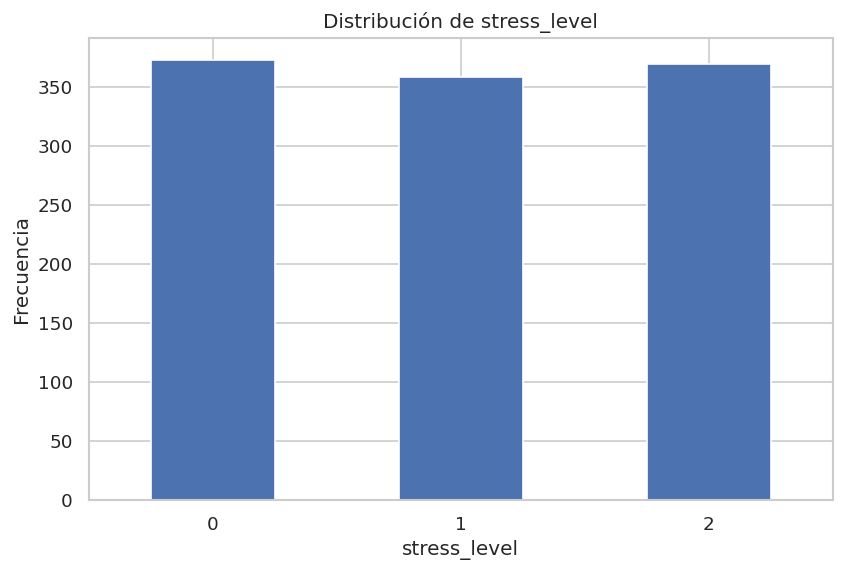

Tabla de distribuci√≥n del target:


freq    pct
stress_level             
0              373 0.3390
1              358 0.3250
2              369 0.3350

In [10]:
assert target_col in dplot.columns, "No encuentro el target en dplot."

plt.figure()
(dplot[target_col].value_counts()
      .sort_index()
      .plot(kind="bar"))
plt.title(f"Distribuci√≥n de {target_col}")
plt.xlabel(target_col); plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

print("Tabla de distribuci√≥n del target:")
display(dplot[target_col].value_counts()
        .sort_index()
        .to_frame("freq")
        .assign(pct=lambda x: (x["freq"]/x["freq"].sum()).round(3)))


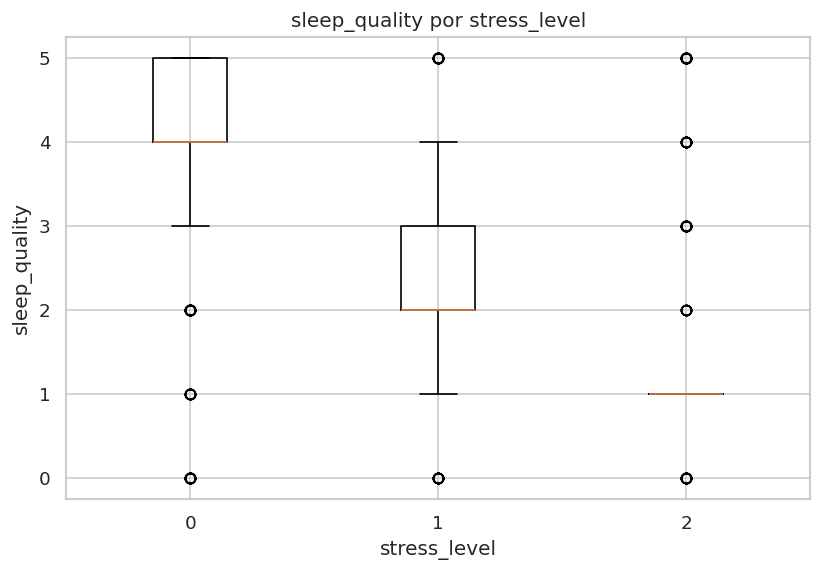

Medias por nivel de stress_level (sleep_quality):


stress_level
0   4.1260
1   2.5310
2   1.3040
Name: sleep_quality, dtype: float64

In [12]:
assert "sleep_quality" in dplot.columns, "No existe sleep_quality en dplot."

niveles = sorted(dplot[target_col].dropna().unique())
grupos = [dplot.loc[dplot[target_col]==k, "sleep_quality"].dropna() for k in niveles]
labels = [str(int(k)) for k in niveles]

plt.figure()
plt.boxplot(grupos, labels=labels, showfliers=True)
plt.title("sleep_quality por stress_level")
plt.xlabel("stress_level"); plt.ylabel("sleep_quality")
plt.show()

print("Medias por nivel de stress_level (sleep_quality):")
display(dplot.groupby(target_col)["sleep_quality"].mean().round(3))


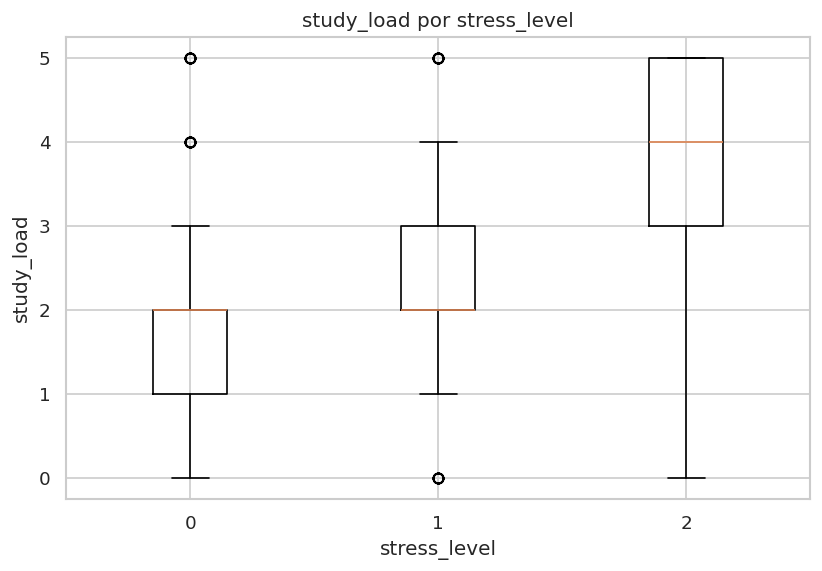

Medias por nivel de stress_level (study_load):


stress_level
0   1.6540
1   2.5340
2   3.6860
Name: study_load, dtype: float64

In [13]:
assert "study_load" in dplot.columns, "No existe study_load en dplot."

niveles = sorted(dplot[target_col].dropna().unique())
grupos = [dplot.loc[dplot[target_col]==k, "study_load"].dropna() for k in niveles]
labels = [str(int(k)) for k in niveles]

plt.figure()
plt.boxplot(grupos, labels=labels, showfliers=True)
plt.title("study_load por stress_level")
plt.xlabel("stress_level"); plt.ylabel("study_load")
plt.show()

print("Medias por nivel de stress_level (study_load):")
display(dplot.groupby(target_col)["study_load"].mean().round(3))


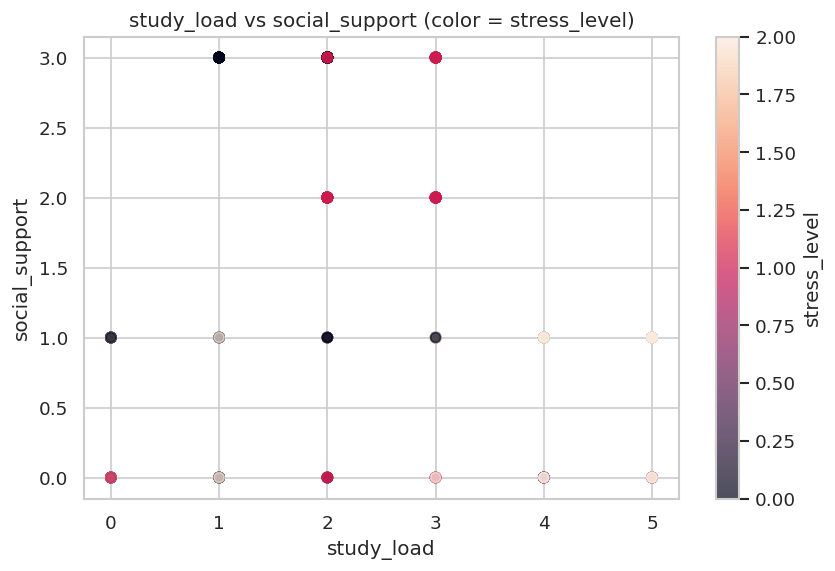

Par visualizado: study_load vs social_support


In [14]:
# Scatterplot
import matplotlib.pyplot as plt

if set(["study_load","social_support"]).issubset(dplot.columns):
    xcol, ycol = "study_load", "social_support"
elif set(["study_load","sleep_quality"]).issubset(dplot.columns):
    xcol, ycol = "study_load", "sleep_quality"
else:
    xcol, ycol = features[:2]  # √∫ltimo recurso

plt.figure()
sc = plt.scatter(dplot[xcol], dplot[ycol], c=dplot[target_col], alpha=0.7)
plt.title(f"{xcol} vs {ycol} (color = {target_col})")
plt.xlabel(xcol); plt.ylabel(ycol)
cbar = plt.colorbar(sc); cbar.set_label(target_col)
plt.show()

print(f"Par visualizado: {xcol} vs {ycol}")


Matriz de correlaci√≥n (num√©rica):


stress_level  sleep_quality  study_load  social_support  peer_pressure  academic_performance
stress_level                1.0000        -0.7490      0.6340         -0.6320         0.6910               -0.7210
sleep_quality              -0.7490         1.0000     -0.5520          0.5550        -0.6490                0.6710
study_load                  0.6340        -0.5520      1.0000         -0.4730         0.5440               -0.5200
social_support             -0.6320         0.5550     -0.4730          1.0000        -0.4900                0.5680
peer_pressure               0.6910        -0.6490      0.5440         -0.4900         1.0000               -0.5630
academic_performance       -0.7210         0.6710     -0.5200          0.5680        -0.5630                1.0000

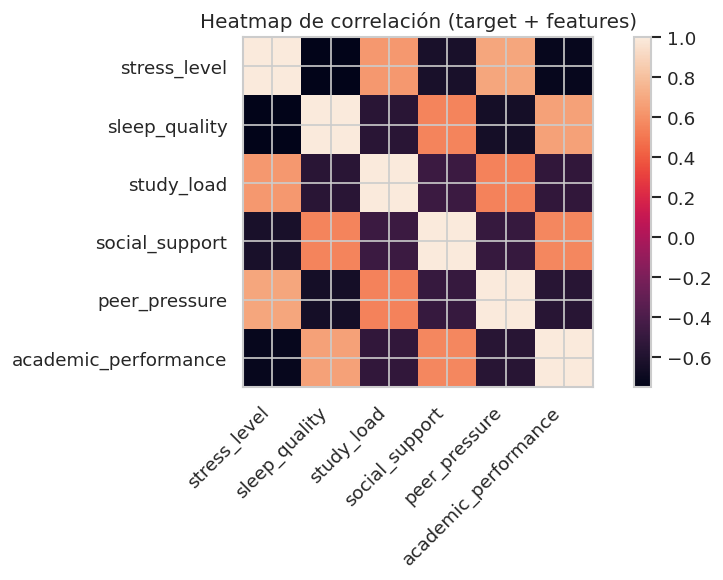

In [15]:
# Matriz de correlaci√≥n para target + features
num_df = dplot.dropna()
if num_df.shape[1] >= 3 and len(num_df) > 0:
    corr = num_df.corr(numeric_only=True).round(3)
    print("Matriz de correlaci√≥n (num√©rica):")
    display(corr)

    plt.figure()
    plt.imshow(corr, interpolation="nearest")
    plt.title("Heatmap de correlaci√≥n (target + features)")
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas num√©ricas completas para correlaci√≥n.")


Interpretaci√≥n de gr√°ficos y hallazgos clave

Luego de cada figura, sintetizo el patr√≥n principal (tendencia, umbrales, outliers, separaci√≥n por clases). Destaco implicaciones pr√°cticas: por ejemplo, si baja sleep_quality coincide con alto estr√©s, defino un umbral operativo que dispare descansos, bloques m√°s cortos o intervenci√≥n del tutor IA.

In [16]:
group_stats = (
    dplot.groupby(target_col)[features]
         .agg(['mean','std','median','count'])
         .round(3)
)
display(group_stats)
print("Orden sugerido de fuerza (ojo: signo indica direcci√≥n):")
speeds = dplot[[target_col]+features].corr(numeric_only=True)[target_col].sort_values(ascending=False)
display(speeds.to_frame('corr_pearson').round(3))


sleep_quality                     study_load                     social_support                      \
                      mean    std median count       mean    std median count           mean    std median count   
stress_level                                                                                                       
0                   4.1260 1.1630 4.0000   373     1.6540 0.9730 2.0000   373         2.5420 0.9540 3.0000   373   
1                   2.5310 0.8550 2.0000   358     2.5340 0.8520 2.0000   358         2.1790 0.9360 2.0000   358   
2                   1.3040 1.0220 1.0000   369     3.6860 1.1900 4.0000   369         0.9270 0.2610 1.0000   369   

             peer_pressure                     academic_performance                      
                      mean    std median count                 mean    std median count  
stress_level                                                                             
0                   1.6760 0.9390 2.0000   373               4.1420 1.1420 4.0000   373  
1                   2.4580 0.8210 2.0000   358               2.4920 0.8090 2.0000   358  
2                   4.0730 1.2300 4.0000   369               1.6610 0.8980 2.0000   369

Orden sugerido de fuerza (ojo: signo indica direcci√≥n):


corr_pearson
stress_level                1.0000
peer_pressure               0.6910
study_load                  0.6340
social_support             -0.6320
academic_performance       -0.7210
sleep_quality              -0.7490

In [17]:
# Correlaci√≥n
def spearman(x, y):
    xr = x.rank(method='average')
    yr = y.rank(method='average')
    return xr.corr(yr)

results = []
for f in features:
    r = spearman(dplot[f], dplot[target_col])
    results.append((f, round(r,3)))
spearman_df = pd.DataFrame(results, columns=['feature','spearman_r']).sort_values('spearman_r', ascending=False)
display(spearman_df)


feature  spearman_r
3         peer_pressure      0.6940
1            study_load      0.6660
2        social_support     -0.6440
4  academic_performance     -0.7280
0         sleep_quality     -0.7610

In [18]:
# Auditor√≠a de colinealidad entre features
corrF = dplot[features].corr(numeric_only=True).round(3)
print("Correlaci√≥n entre features:")
display(corrF)

high_pairs = []
for i, c1 in enumerate(features):
    for c2 in features[i+1:]:
        r = corrF.loc[c1, c2]
        if abs(r) >= 0.70:
            high_pairs.append((c1, c2, r))

flag_df = pd.DataFrame(high_pairs, columns=["feature_1","feature_2","corr_pearson_r"]).sort_values("corr_pearson_r", ascending=False)
print("\nPares con |r| ‚â• 0.70 (posible redundancia):")
display(flag_df if not flag_df.empty else pd.DataFrame({"msg":["No se detect√≥ alta colinealidad."]}))


Correlaci√≥n entre features:


sleep_quality  study_load  social_support  peer_pressure  academic_performance
sleep_quality                1.0000     -0.5520          0.5550        -0.6490                0.6710
study_load                  -0.5520      1.0000         -0.4730         0.5440               -0.5200
social_support               0.5550     -0.4730          1.0000        -0.4900                0.5680
peer_pressure               -0.6490      0.5440         -0.4900         1.0000               -0.5630
academic_performance         0.6710     -0.5200          0.5680        -0.5630                1.0000


Pares con |r| ‚â• 0.70 (posible redundancia):


msg
0  No se detect√≥ alta colinealidad.

In [19]:
# Selecci√≥n final de features + resumen

def spearman(x, y):
    xr = x.rank(method='average'); yr = y.rank(method='average')
    return xr.corr(yr)

# Ranking por Spearman
results = [(f, round(spearman(dplot[f], dplot[target_col]),3)) for f in features]
spearman_df = pd.DataFrame(results, columns=['feature','spearman_r']).sort_values('spearman_r', ascending=False)
print("Ranking por Spearman:")
display(spearman_df)

# Selecci√≥n final (como no hay colinealidad alta, mantenemos las 5)
final_features = features.copy()
print("Features finales seleccionadas:", final_features)

# Texto resumen
lines = []
lines.append(f"Target: {target_col} (nivel de estr√©s) con distribuci√≥n equilibrada por clases.")
lines.append("Selecci√≥n final de se√±ales (no redundantes): " + ", ".join(final_features) + ".")
for f in final_features:
    if f == "sleep_quality":
        lines.append("- sleep_quality: relaci√≥n inversa fuerte con el estr√©s (Spearman ‚âà negativo alto).")
    elif f == "study_load":
        lines.append("- study_load: relaci√≥n directa; mayor carga de estudio ‚Üí mayor estr√©s.")
    elif f == "social_support":
        lines.append("- social_support: relaci√≥n inversa; mayor apoyo ‚Üí menor estr√©s.")
    elif f == "peer_pressure":
        lines.append("- peer_pressure: relaci√≥n directa; m√°s presi√≥n de pares ‚Üí mayor estr√©s.")
    elif f == "academic_performance":
        lines.append("- academic_performance: relaci√≥n inversa; peor desempe√±o ‚Üí mayor estr√©s.")
    else:
        lines.append(f"- {f}: se√±al relevante asociada al estr√©s.")

lines.append("Evidencia EDA: boxplots confirman tendencias por nivel; scatter sugiere interacci√≥n (alta carga + bajo apoyo = mayor estr√©s).")
summary_text = "\n".join(lines)

print("\n=== RESUMEN EDA (para informe) ===")
print(summary_text)



Ranking por Spearman:


feature  spearman_r
3         peer_pressure      0.6940
1            study_load      0.6660
2        social_support     -0.6440
4  academic_performance     -0.7280
0         sleep_quality     -0.7610

Features finales seleccionadas: ['sleep_quality', 'study_load', 'social_support', 'peer_pressure', 'academic_performance']

=== RESUMEN EDA (para informe) ===
Target: stress_level (nivel de estr√©s) con distribuci√≥n equilibrada por clases.
Selecci√≥n final de se√±ales (no redundantes): sleep_quality, study_load, social_support, peer_pressure, academic_performance.
- sleep_quality: relaci√≥n inversa fuerte con el estr√©s (Spearman ‚âà negativo alto).
- study_load: relaci√≥n directa; mayor carga de estudio ‚Üí mayor estr√©s.
- social_support: relaci√≥n inversa; mayor apoyo ‚Üí menor estr√©s.
- peer_pressure: relaci√≥n directa; m√°s presi√≥n de pares ‚Üí mayor estr√©s.
- academic_performance: relaci√≥n inversa; peor desempe√±o ‚Üí mayor estr√©s.
Evidencia EDA: boxplots confirman tendencias por nivel; scatter sugiere interacci√≥n (alta carga + bajo apoyo = mayor estr√©s).


# **C√≥mo conviertir√≠a los hallazgos del EDA en acciones de la app**

A partir de que stress_level est√° balanceado y muestra relaciones robustas con mis se√±ales (sleep_quality üîº, study_load üîº, peer_pressure üîº, social_support üîΩ, academic_performance üîΩ), esto se veria as√≠:

Reglas de activaci√≥n:

Riesgo alto (alta prioridad):

sleep_quality ‚â§ 2 y study_load ‚â• 3, o

peer_pressure ‚â• 4, o academic_performance ‚â§ 2 y social_support ‚â§ 1.

Riesgo medio (vigilancia + apoyo puntual):

sleep_quality = 2‚Äì3 o study_load = 3 o social_support = 1‚Äì2.

Riesgo bajo:

sleep_quality ‚â• 4 y study_load ‚â§ 2 y social_support ‚â• 2.

Acciones adaptativas por nivel:

Alto estr√©s: reducir carga (bloques de 20‚Äì25 min), incluir pausas guiadas y microtutor√≠a; priorizar ejercicios cortos y objetivos alcanzables.

Estr√©s medio: mantener ritmo con microexplicaciones, tarjetas de refuerzo y recordatorios suaves de higiene del sue√±o.

Estr√©s bajo: re-escalar gradualmente dificultad y duraci√≥n de bloques; feedback positivo para consolidar h√°bitos.

Interacci√≥n clave detectada:
alto study_load + bajo social_support eleva el estr√©s.

‚Üí Si study_load ‚â• 3 y social_support ‚â§ 1, agregar√≠a: checklist de planificaci√≥n corta + sugerencia de ‚ÄúAI buddy‚Äù/foro/estudio acompa√±ado dentro de la app.